In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Making new Data Frame
cdf = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]
cdf.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Correlation Template Code

<Axes: >

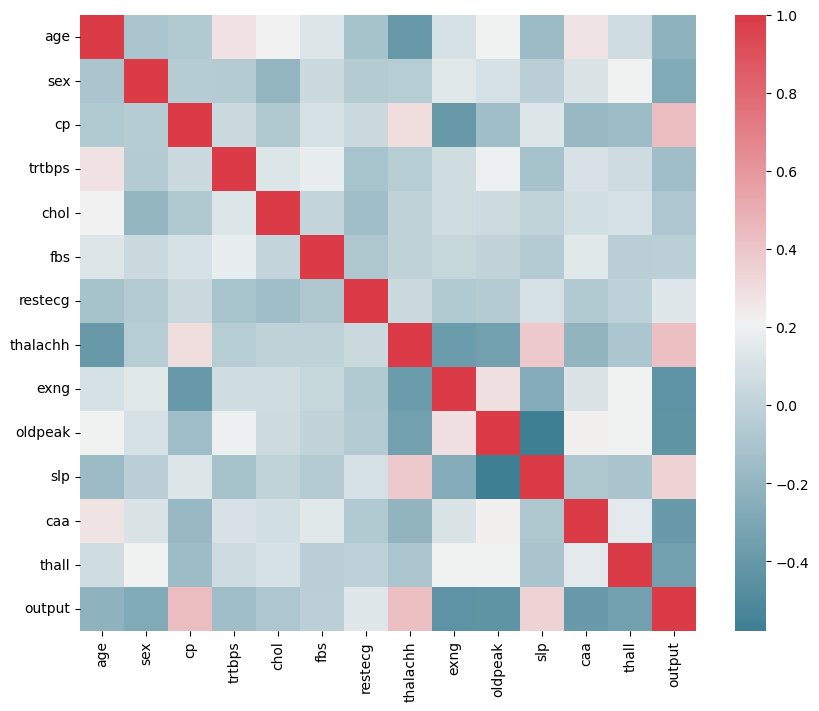

In [4]:
# import packages
import seaborn as sns

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = cdf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [5]:
# Univariate Testing: Regression Task Code Template
from sklearn.feature_selection import SelectKBest, f_regression

# import data
X_all = cdf.drop(["output"], axis = 1)
y = cdf["output"]

feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X_all,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X_all.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X = X_all[selected_variables]
X

,exng,cp,oldpeak,thalachh,caa,slp,thall,sex,age,trtbps,restecg
0,0,3,2.3,150,0,0,1,1,63,145,0
1,0,2,3.5,187,0,0,2,1,37,130,1
2,0,1,1.4,172,0,2,2,0,41,130,0
3,0,1,0.8,178,0,2,2,1,56,120,1
4,1,0,0.6,163,0,2,2,0,57,120,1
...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0.2,123,0,1,3,0,57,140,1
299,0,3,1.2,132,0,1,3,1,45,110,1
300,0,0,3.4,141,2,1,3,1,68,144,1
301,1,0,1.2,115,1,1,3,1,57,130,1


Optimal number of features: 9


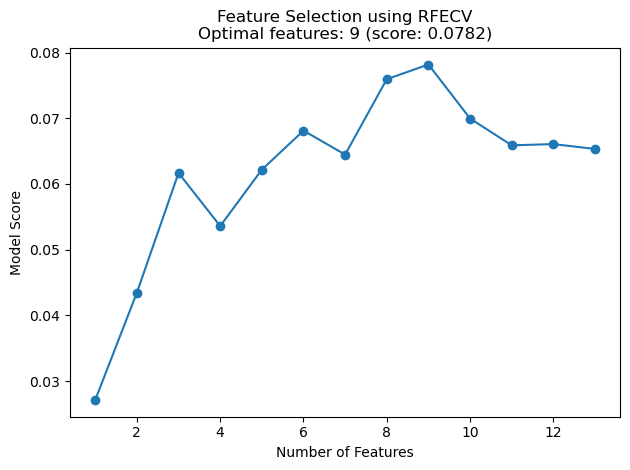

,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,1,3,0,150,0,2.3,0,0,1
1,1,2,1,187,0,3.5,0,0,2
2,0,1,0,172,0,1.4,2,0,2
3,1,1,1,178,0,0.8,2,0,2
4,0,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...
298,0,0,1,123,1,0.2,1,0,3
299,1,3,1,132,0,1.2,1,0,3
300,1,0,1,141,0,3.4,1,2,3
301,1,0,1,115,1,1.2,1,1,3


In [7]:
# Recursive Feature Elimination with CV Code
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
X_all = cdf.drop(["output"], axis=1)
y = cdf["output"]

# Model and selector
regressor = LinearRegression()
feature_selector = RFECV(regressor)

# Fit
fit = feature_selector.fit(X_all, y)

# Optimal number of features
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

# Reduced feature set
X = X_all.loc[:, feature_selector.support_]

# Plot score vs number of features
mean_scores = fit.cv_results_['mean_test_score'] if hasattr(fit, 'cv_results_') else fit.grid_scores_
plt.plot(range(1, len(mean_scores) + 1), mean_scores, marker="o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFECV\nOptimal features: {optimal_feature_count} "
          f"(score: {round(max(mean_scores), 4)})")
plt.tight_layout()
plt.show()
X

In [79]:
# Univariate Testing: Classification Task Code Template
from sklearn.feature_selection import SelectKBest, chi2

# import data
X_all = cdf.drop(["output"], axis = 1)
y = cdf["output"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X_all,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X_all.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X = X_all[selected_variables]
X

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex,thall
0,150,2.3,0,3,0,233,63,145,0,1,1
1,187,3.5,0,2,0,250,37,130,0,1,2
2,172,1.4,0,1,0,204,41,130,2,0,2
3,178,0.8,0,1,0,236,56,120,2,1,2
4,163,0.6,0,0,1,354,57,120,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
298,123,0.2,0,0,1,241,57,140,1,0,3
299,132,1.2,0,3,0,264,45,110,1,1,3
300,141,3.4,2,0,0,193,68,144,1,1,3
301,115,1.2,1,0,1,131,57,130,1,1,3


In [8]:
# Creating ndarray variables
# X = cdf[['sex', 'cp', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
# y = cdf['output'].values

In [80]:
# Split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 11) (242,)
Test set: (61, 11) (61,)


In [81]:
# Preprocessing on the splitted data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler().fit(X_train)
#scaler = MinMaxScaler().fit(X_train)
X_train_SS = scaler.transform(X_train.astype(float))
X_test_SS =  scaler.transform(X_test.astype(float))

## K-Nearest Neighbors

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_SS,y_train)
    # Prediction
    yhat=neigh.predict(X_test_SS)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

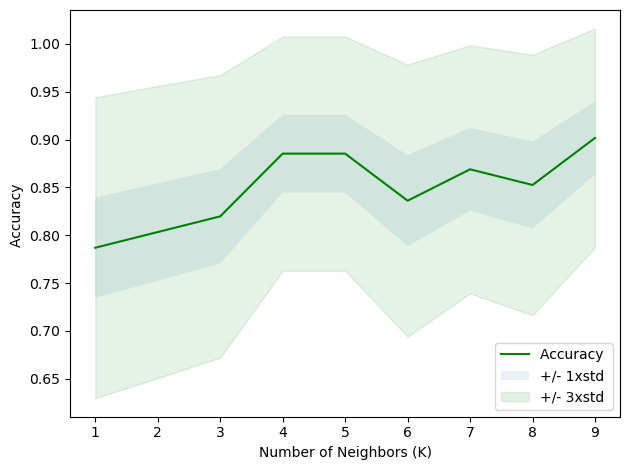

In [83]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [84]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9016393442622951 with k= 9


In [85]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_SS,y_train)
predNeigh = neigh.predict(X_test_SS)

## Decision Trees

In [86]:
from sklearn.tree import DecisionTreeClassifier

# {“gini”, “entropy”, “log_loss”}
# Train the model
heartree = DecisionTreeClassifier(criterion="gini", max_depth=6)
heartree.fit(X_train_SS, y_train)

# Predict on test data (optional)
predTree = heartree.predict(X_test_SS)
y_test[:5]

113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64

In [87]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8360655737704918


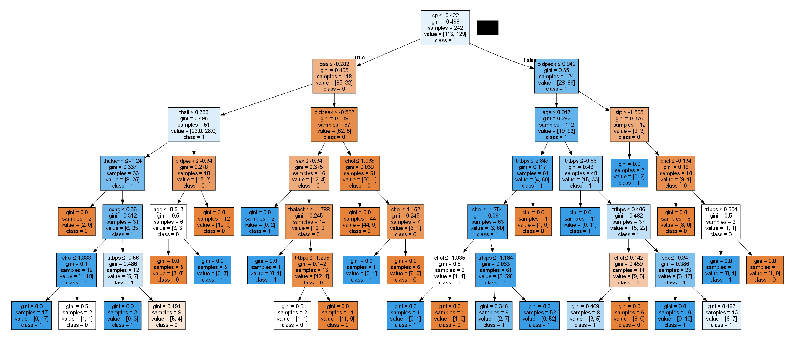

In [88]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

# Prepare for Graphviz export
dot_data = StringIO()
filename = "heartree.png"

# Feature names: ensure this matches your data
# If X_train_SS is a DataFrame, you can use its columns
# featureNames = X_train_SS.columns
featureNames = X.columns[0:13]  # adjust if needed

# Class names: convert to strings
class_names = [str(c) for c in np.unique(y_train)]

# Export to DOT format using the trained model
out = tree.export_graphviz(
    heartree,
    feature_names=featureNames,
    out_file=dot_data,
    class_names=class_names,
    filled=True,
    special_characters=True,
    rotate=False
)

# Build graph and save PNG
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)


# Display the image
img = mpimg.imread(filename)
plt.figure(figsize=(10, 8))  # adjust as needed
plt.imshow(img, interpolation='nearest')
plt.axis('off')
plt.show()

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train_SS,y_train)

predLR = LR.predict(X_test_SS)

predLR_prob = LR.predict_proba(X_test_SS)
predLR_prob[:5]

array([[0.31, 0.69],
       [0.88, 0.12],
       [0.44, 0.56],
       [0.04, 0.96],
       [0.28, 0.72]])

In [90]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, predLR, pos_label=0)

0.7777777777777778

In [91]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 3 22]]


Confusion matrix, without normalization
[[34  2]
 [ 4 21]]


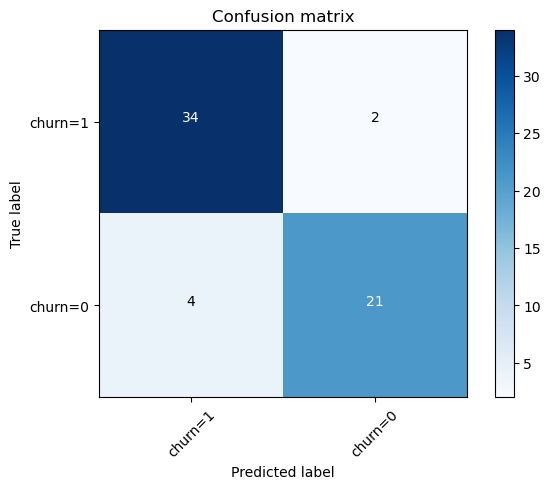

In [92]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predLR, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [93]:
print (classification_report(y_test, predLR))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



In [94]:
from sklearn.metrics import log_loss

log_loss(y_test, predLR_prob)

0.31718935766477724

## SVM (Support Vector Machines)

In [95]:
from sklearn import svm

# {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_SS, y_train) 

predClf = clf.predict(X_test_SS)
predClf [0:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [96]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.85      0.94      0.89        36

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix, without normalization
[[19  6]
 [ 2 34]]


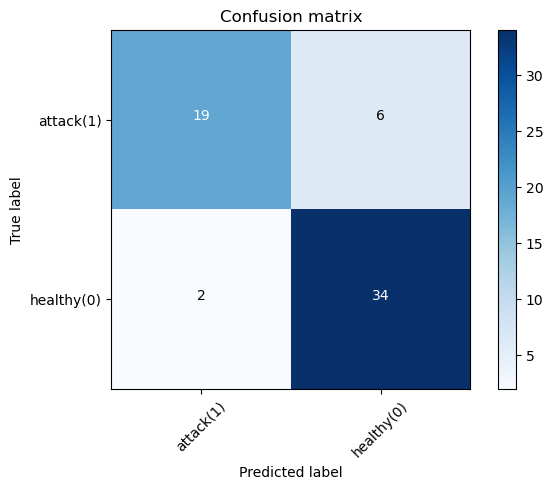

In [97]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predClf, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predClf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['attack(1)','healthy(0)'],normalize= False,  title='Confusion matrix')


In [98]:
from sklearn.metrics import f1_score
f1_score(y_test, predClf, average='weighted') 

0.8666016430956222

In [99]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, predClf,pos_label=1)

0.8095238095238095

# Evaluation

In [100]:
from sklearn import metrics
print( "The best accuracy in KNN was with k =", mean_acc.argmax()+1) 
print("Train set Accuracy KNN: ", metrics.accuracy_score(y_train, neigh.predict(X_train_SS)))
print("Test set Accuracy KNN: ", metrics.accuracy_score(y_test, predNeigh))
print()

print("Train set Accuracy Decision Tree with Depth = 6: ", metrics.accuracy_score(y_train, heartree.predict(X_train_SS)))
print("Test set Accuracy Decision Tree with Depth = 6: ", metrics.accuracy_score(y_test, predTree))
print()

print("Train set Accuracy in Logistic Regresion ", metrics.accuracy_score(y_train, LR.predict(X_train_SS)))
print("Test set Accuracy in Logistic Regresion: ", metrics.accuracy_score(y_test, predLR))
print (classification_report(y_test, predLR))
print()

print("Train set Accuracy in SVM ", metrics.accuracy_score(y_train, clf.predict(X_train_SS)))
print("Test set Accuracy in SVM: ", metrics.accuracy_score(y_test, predClf))
print (classification_report(y_test, predClf))
print()

The best accuracy in KNN was with k = 9
Train set Accuracy KNN:  0.8553719008264463
Test set Accuracy KNN:  0.9016393442622951

Train set Accuracy Decision Tree with Depth = 6:  0.9297520661157025
Test set Accuracy Decision Tree with Depth = 6:  0.8360655737704918

Train set Accuracy in Logistic Regresion  0.8471074380165289
Test set Accuracy in Logistic Regresion:  0.9016393442622951
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61


Train set Accuracy in SVM  0.9132231404958677
Test set Accuracy in SVM:  0.8688524590163934
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.85      0.94      0.89        36

    accuracy                